
# Appendix 3. Optinisation of XGBClassifier with data features selected based on the K highest Chi-squared Scores¶

## Dissertation, CP70017E, June 2022
### Supervisor: Professor Konstantin Nikolic
### Student: Mariya Ivanova, 21435612


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data from Apendix 1, In[76]
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

In [3]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [4]:
# XGBClassifier (eXtreme Gradient Boosting)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgbc = XGBClassifier(verbosity=0, use_label_encoder=False)

# Instantiate the GridSearchCV object and run the search
parameters = {'max_depth':[3, 18, 1],
              'gamma': [1,9],
              'reg_alpha' : [40,180,1],
              'reg_lambda' : ['reg_lambda', 0,1],
              'colsample_bytree' : ['colsample_bytree', 0.5,1],
              'min_child_weight' : ['min_child_weight', 0, 10, 1],
              'n_estimators': [180,100],
              'seed': [0]
}
searcher = GridSearchCV(xgbc, parameters, cv=10)
searcher.fit(X_train, y_train)


# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:",
      searcher.score(X_test, y_test))

Best CV params {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 180, 'reg_alpha': 1, 'reg_lambda': 0, 'seed': 0}
Best CV accuracy 0.9733333333333334
Test accuracy of best grid search hypers: 0.9215686274509803


In [5]:
xgbc = XGBClassifier(colsample_bytree=0.5, gamma=1,
                     max_depth=3, min_child_weight=0,
                     n_estimators=180, reg_alpha=1,
                     reg_lambda=0, seed=0)

xgbc.fit(X_train, y_train)
print(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=1, reg_lambda=0, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [6]:
from sklearn.metrics import accuracy_score

y_test_pred = xgbc.predict(X_test)
y_train_pred = xgbc.predict(X_train)
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.9868421052631579
Accuracy test:  0.9215686274509803


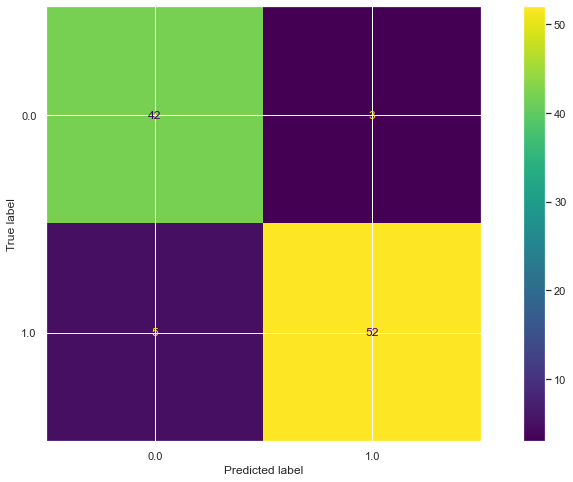

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

cm = confusion_matrix(y_test, y_test_pred, labels=xgbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgbc.classes_)
disp.plot()
plt.show()

Observation: 44+50 correct predictions and 7+1 incorrect predictions.

In [8]:
from sklearn.metrics import classification_report

print('XGBClassifier Classification Report :\n\n', 
      classification_report(y_test, y_test_pred))

XGBClassifier Classification Report :

               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        45
         1.0       0.95      0.91      0.93        57

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102



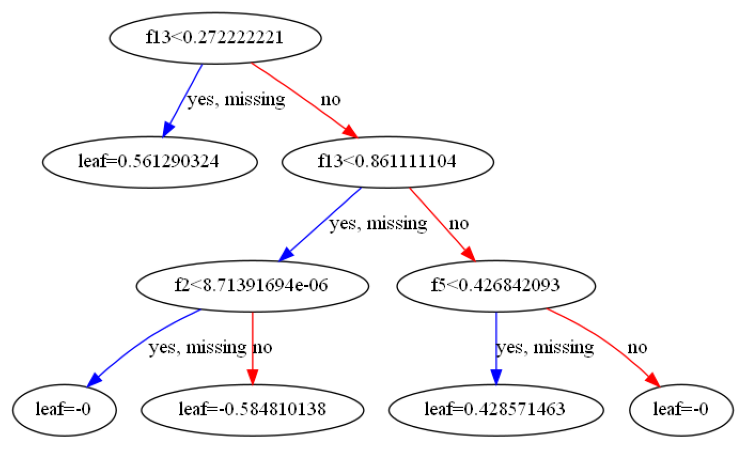

In [9]:
from xgboost import plot_tree

plot_tree(xgbc)
plt.show()

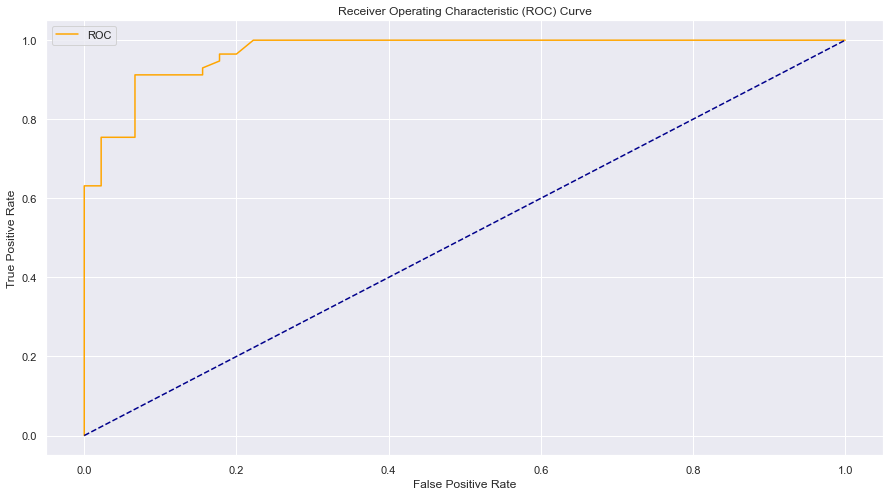

In [10]:
# ROC
from sklearn.metrics import roc_curve  

def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = xgbc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

[<a href="#content">Back to top</a>]

## Prediction bioapplicability of a new nanorobot

In [11]:
# Use the model to predict new nanorobots bioaplicability 
import pandas as pd

model= xgbc
pd.to_pickle(model,r'C:\Users\ivano\Dissertation\Code\new_model.pickle')
model = pd.read_pickle(r'C:\Users\ivano\Dissertation\Code\new_model.pickle')

In [12]:
# NR new values user inputs 
Mass = float(input("Enter mass: "))

Enter mass: 0.0000000000029


In [13]:
Zeta_potential = float(input("Enter zeta_potential: "))

Enter zeta_potential: 4.5


In [14]:
Concentration = float(input("Enter concentration: "))

Enter concentration: 20


In [15]:
eV = float(input("Enter eV: "))

Enter eV: 22


In [16]:
Toxicity = float(input("Enter zeta potential: "))

Enter zeta potential: 0.8


In [17]:
Energy_source_no = float(input("No need of energy source: "))

No need of energy source: 0.0


In [18]:
Shape_Janus = float(input("Is it a Janus shape: "))

Is it a Janus shape: 1.0


In [19]:
# Creat DataFramefrom the new values
mass = [Mass]
zeta_potential = [Zeta_potential]
concentration = [Concentration]
ev = [eV]
toxicity = [Toxicity]
energy_source_no = [Energy_source_no]
shape_Janus = [Shape_Janus]



dataf = pd.DataFrame({'mass':mass, 'zeta_potential':zeta_potential,
                    'concentration':concentration, 'ev':ev,
                    'toxicity':toxicity, 'energy_source_no':energy_source_no,
                    'shape_Janus':shape_Janus})
dataf

,mass,zeta_potential,concentration,ev,toxicity,energy_source_no,shape_Janus
0,2.900000e-12,4.5,20.0,22.0,0.8,0.0,1.0


In [20]:
# Metadata
data = []
for feature in dataf.columns:

 # Defining the role
    if 'mass' in feature or feature == 'zeta_potential'\
    or feature == 'concentration'  or feature == 'ev'\
    or feature == 'toxicity' or feature == 'energy_source_no'\
    or feature == 'shape_Janus':
        use = 'input'
        
 # Defining the type        
    if 'mass' in feature or feature == 'zeta_potential'\
    or feature == 'concentration'  or feature == 'ev'\
    or feature == 'toxicity' or feature == 'energy_source_no'\
    or feature == 'shape_Janus':
        type = 'real'

# Initialize preserve to True for all variables
    preserve = True

# Defining the data type     
    dtype = dataf[feature].dtype
    if 'mass' in feature or feature == 'zeta_potential'\
    or feature == 'concentration'  or feature == 'ev'\
    or feature == 'toxicity' or feature == 'energy_source_no'\
    or feature == 'shape_Janus':
        dtype = dataf[feature].dtype
        
        
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'type': type,
        'preserve': preserve,
        'dtype': dtype,
    }
    data.append(feature_dictionary)
    
    
meta = pd.DataFrame(data, columns=['varname', 'use', 'type', 'preserve', 'dtype'])
meta.set_index('varname', inplace=True)
pd.set_option('display.max_rows', meta.shape[0]+1)
print(meta)

                    use  type  preserve    dtype
varname                                         
mass              input  real      True  float64
zeta_potential    input  real      True  float64
concentration     input  real      True  float64
ev                input  real      True  float64
toxicity          input  real      True  float64
energy_source_no  input  real      True  float64
shape_Janus       input  real      True  float64


In [21]:
# Creat interaction variables
from sklearn.preprocessing import PolynomialFeatures

v = meta[(meta.type == 'real') & (meta.preserve)].index
poly = PolynomialFeatures(degree=2, interaction_only=False,
                          include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(dataf[v]),
                            columns=poly.get_feature_names_out(v))
# Remove the original columns
interactions.drop(v, axis=1, inplace=True)
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables'.format(dataf.shape[1]))
dataf = pd.concat([dataf, interactions], axis=1)
print('After creating interactions we have {} variables'.format(dataf.shape[1]))

Before creating interactions we have 7 variables
After creating interactions we have 35 variables


In [22]:
dataf

,mass,zeta_potential,concentration,ev,toxicity,energy_source_no,shape_Janus,mass^2,mass zeta_potential,mass concentration,...,ev^2,ev toxicity,ev energy_source_no,ev shape_Janus,toxicity^2,toxicity energy_source_no,toxicity shape_Janus,energy_source_no^2,energy_source_no shape_Janus,shape_Janus^2
0,2.900000e-12,4.5,20.0,22.0,0.8,0.0,1.0,8.410000e-24,1.305000e-11,5.800000e-11,...,484.0,17.6,0.0,22.0,0.64,0.0,0.8,0.0,0.0,1.0


In [23]:
# Using 14 variables determoned asthe most influential
result = model.predict([[dataf['mass^2'].mean(), dataf['mass zeta_potential'].mean(),
                         dataf['mass concentration'].mean(), dataf['mass ev'].mean(), 
                         dataf['concentration^2'].mean(), dataf['zeta_potential^2'].mean(),
                         dataf['concentration toxicity'].mean(), dataf['zeta_potential toxicity'].mean(),
                         dataf['mass'].mean(),dataf['energy_source_no'].mean(), dataf['shape_Janus'].mean(), 
                         dataf['concentration ev'].mean(), dataf['toxicity'].mean()]])

In [24]:
print("Prediction is {}".format(result))
print("Legent:\n[1] is 'Yes', it is bio-applicable\n[0] is 'No', it is not bio-applicable")

Prediction is [1.]
Legent:
[1] is 'Yes', it is bio-applicable
[0] is 'No', it is not bio-applicable


In [25]:
print("mass^2: {}".format(dataf['mass^2'].mean()))
print("mass zeta_potential: {}".format(dataf['mass zeta_potential'].mean()))
print("mass concentration: {}".format(dataf['mass concentration'].mean()))
print("mass ev: {}".format(dataf['mass ev'].mean()))
print("concentration^2: {}".format(dataf['concentration^2'].mean()))
print("zeta_potential^2: {}".format(dataf['zeta_potential^2'].mean()))
print("zeta_potential concentration: {}".format(dataf['zeta_potential concentration'].mean()))
print("concentration toxicity: {}".format(dataf['concentration toxicity'].mean()))
print("zeta_potential toxicity: {}".format(dataf['zeta_potential toxicity'].mean()))
print("mass: {}".format(dataf['mass'].mean()))
print("energy_source_no: {}".format(dataf['energy_source_no'].mean()))
print("shape_Janus: {}".format(dataf['shape_Janus'].mean())) 
print("concentration ev: {}".format(dataf['concentration ev'].mean()))
print("toxicity: {}".format(dataf['toxicity'].mean()))

mass^2: 8.410000000000002e-24
mass zeta_potential: 1.3050000000000001e-11
mass concentration: 5.8000000000000007e-11
mass ev: 6.38e-11
concentration^2: 400.0
zeta_potential^2: 20.25
zeta_potential concentration: 90.0
concentration toxicity: 16.0
zeta_potential toxicity: 3.6
mass: 2.9e-12
energy_source_no: 0.0
shape_Janus: 1.0
concentration ev: 440.0
toxicity: 0.8


[<a href="#content">Back to top</a>]